## Manual Imports and Installs:

In [1]:
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy
from imblearn.over_sampling import SMOTE


# Load the Telco Data and display  
name = 'churn.csv'
data = pd.read_csv(name)

data.head()


/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Exploration

In [2]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
# Check for missing or invalid values in the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [4]:

# handle TotalCharges Type (it should be numeric but may have invalid entries)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# fill with the median value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# verify updates
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/var/folders/s_/kpvlk3bs5v7_vx6qt436qn400000gn/T/ipykernel_9311/1539093827.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


### Encoding Categorical Variables and Normalising Numerical Values.

In [5]:
# Encode categorical variables using LabelEncoder
categorical_columns = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "Churn"
]

# Initialize LabelEncoder
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Drop unnecessary columns (e.g., customerID as it's not useful for prediction)
data = data.drop(columns=["customerID"])

# Split data into features (X) and target (y)
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check data readiness
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 19), (1409, 19), (5634,), (1409,))

## Data Preprocessing SitRep:
### The data has now been preprocessed.

- Categorical variables have been encoded.
- Numerical variables have been normalised.
- The dataset is split into training and testing sets:

    - Training set: 5634 samples
    - Testing set: 1409 samples
    

## Training and Evaluating 
### 1) Logistic Regression

In [6]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_probs)
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")
print(classification_report(y_test, lr_preds))


Logistic Regression:
Accuracy: 0.8006
ROC-AUC: 0.8403
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



The Logisitic Regression has an Accuracy of 80% and an 

## 2) Decision Tree

In [7]:
# Train and evaluate the DT
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# ACC and AUC
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_probs)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")
print(classification_report(y_test, dt_preds))


Decision Tree:
Accuracy: 0.7303
ROC-AUC: 0.6625
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



The **Decision Tree** has an Accuracy of 73% and an ROC of 66%.

Decision Trees may overfit the training data, leading to poorer generalisation compared to Logistic Regression.

## 3) Random Forest

In [8]:
# Random Forest  fit, predict
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Accuracy and AUC
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")
print(classification_report(y_test, rf_preds))


Random Forest:
Accuracy: 0.7913
ROC-AUC: 0.8222
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



The **Random Forest** managed to achieve 
- Accuracy : 79%
- AUC : 82% 

Similar to the previous models, it performs well for non-churned customers but struggles with recall for churned customers.
 
This can be seen via the Recall and Precision values for the 0 (non churned) and 1 (churned) class.

## 4) Simple Neural Network

In [9]:
# simple dense neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# compile
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# eval
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
nn_probs = nn_model.predict(X_test).flatten()
nn_auc = roc_auc_score(y_test, nn_probs)
nn_preds = (nn_probs > 0.5).astype(int)


# Display the eval metrics.
print("Dense Custom NN:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"ROC-AUC: {nn_auc:.4f}")
print(classification_report(y_test, nn_preds))


/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
Dense Custom NN:
Accuracy: 0.7984
ROC-AUC: 0.8399
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



This model shows suprisingly good results for such a simple network. Time to explore the results.

## Evaluation

In [10]:

model_performances = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Simple Neural Network"],
    "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy],
    "ROC-AUC": [lr_auc, dt_auc, rf_auc, nn_auc]
})

model_performances


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.800568,0.840290
1,Decision Tree,0.730305,0.662526
2,Random Forest,0.791341,0.822234
3,Simple Neural Network,0.798439,0.839936


The best Model ....

In [11]:


def plot_model_performance(models, X_test, y_test):
    """
    Plots ROC curves for all models first, followed by confusion matrices in subplots.
    
    Parameters:
        models (dict): Dictionary with model names as keys and trained models as values.
        X_test (DataFrame): Test features.
        y_test (Series): True labels for test data.
    """
    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if model_name == "Simple Neural Network":
            # Special handling for the nn 
            y_prob = model.predict(X_test, verbose=0).flatten()
        elif hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue  # Skip models that cannot provide probabilities

        RocCurveDisplay.from_predictions(y_test, y_prob, name=model_name, ax=plt.gca())
    
    plt.title("ROC Curves for All Models")
    plt.show()

    # Step 2: Display all confusion matrices in a grid
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))
    axes = axes.flatten()  # axes is iterable

    for idx, (model_name, model) in enumerate(models.items()):
        if model_name == "Simple Neural Network":
            # Special handling for the Keras model
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", ax=axes[idx])
        axes[idx].set_title(model_name)

    plt.tight_layout()
    plt.show()

    # Step 3: Print classification reports
    for model_name, model in models.items():
        if model_name == "Simple Neural Network":
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

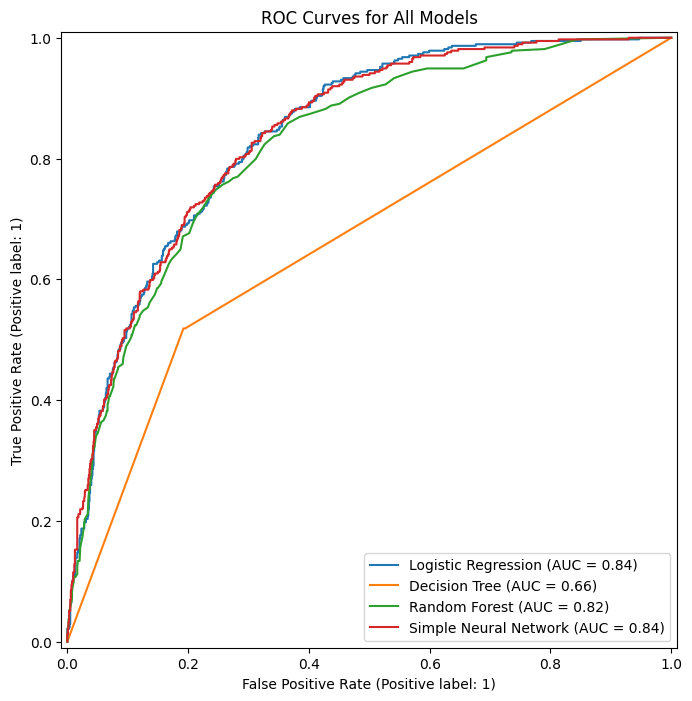

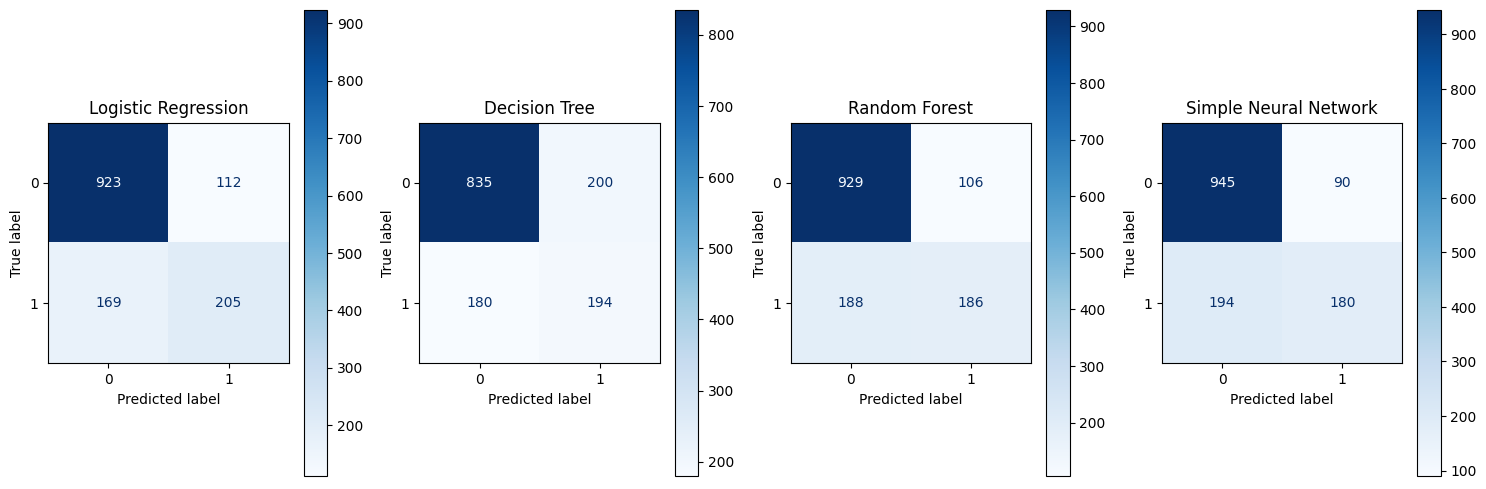

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409

In [12]:
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Simple Neural Network": nn_model
}
plot_model_performance(models, X_test, y_test)


So far, it seems the best model is the Logistic Regression. 

---

# Extension: A More Advanced NN 
### Enhancements for Improved Churn Prediction Accuracy

This section outlines the changes implemented to improve the churn prediction accuracy using a more advanced neural network. The enhancements span across data preprocessing, model architecture, and training optimisation.


#### **1. Data Preprocessing**
- **Feature Scaling**: 
  - Applied `StandardScaler` to normalize all input features. Neural networks converge faster and perform better with scaled inputs.
- **SMOTE for Class Imbalance**: 
  - Used Synthetic Minority Oversampling Technique (SMOTE) to handle class imbalance in the dataset by generating synthetic examples for the minority class (`Churn`). This ensures the model doesn't bias toward the majority class (`No Churn`).


#### **2. Model Architecture**
- **Multi-Layer Neural Network**:
  - Introduced multiple dense layers to capture complex relationships between input features.
  - Each layer uses the ReLU activation function for non-linear transformations.
  
- **Batch Normalization**:
  - Normalizes layer inputs to reduce internal covariate shift, enabling faster convergence and stability during training.
  
- **Dropout Layers**:
  - Added dropout layers after each dense layer to prevent overfitting by randomly deactivating neurons during training.
  
- **Skip Connections**:
  - Inspired by ResNet, skip connections allow gradients to flow through the network more effectively. This mitigates the vanishing gradient problem and enhances learning in deeper architectures.

- **L2 Regularization**:
  - Applied weight regularization (L2 penalty) to dense layers. This discourages large weight values, reducing overfitting and improving generalization.

- **Sigmoid Output Layer**:
  - The final layer uses a sigmoid activation function for binary classification, outputting probabilities for each class.


#### **3. Training Optimization**
- **Binary Cross-Entropy Loss**:
  - Used as the loss function for binary classification tasks, ensuring appropriate penalization for misclassifications.
  
- **Adam Optimizer**:
  - An adaptive learning rate optimizer that combines the benefits of RMSProp and SGD, ensuring efficient and robust updates to weights.

- **Learning Rate Scheduler**:
  - Incorporated `ReduceLROnPlateau` to dynamically decrease the learning rate when the validation loss stops improving, ensuring finer adjustments during training.

- **Early Stopping**:
  - Used early stopping to monitor validation loss and halt training when performance plateaus, preventing overfitting to the training data.


### Benefits of These Changes:
1. **Better Handling of Class Imbalance**:
   - SMOTE ensures the model sees enough examples of both classes (`Churn` and `No Churn`), leading to improved recall for the minority class.
   
2. **Improved Model Generalization**:
   - Batch normalization, dropout, and L2 regularization collectively reduce overfitting, allowing the model to generalize better to unseen data.
   
3. **Robust Gradient Flow**:
   - Skip connections alleviate the vanishing gradient problem, enabling deeper networks to train effectively.
   
4. **Optimized Training Process**:
   - Early stopping and a learning rate scheduler ensure efficient training without overfitting or wasted computation.


### Conclusion
These enhancements create a more advanced and robust neural network capable of learning complex patterns in the churn dataset. With improved preprocessing, architecture, and optimization techniques, this model is designed to outperform simpler models like Logistic Regression or Decision Trees, achieving higher accuracy and better recall for churn prediction.


In [13]:

# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling Class Imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Build an advanced neural network
def build_advanced_nn(input_dim):
    inputs = Input(shape=(input_dim,))
    
    # First hidden layer
    x = Dense(128, activation='relu', kernel_regularizer='l2')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Second hidden layer with skip connection
    skip_connection = Dense(64, activation='relu', kernel_regularizer='l2')(x)
    skip_connection = BatchNormalization()(skip_connection)
    x = Dropout(0.3)(skip_connection)
    x = Dense(64, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Add()([x, skip_connection])
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    return model

# Instantiate the model
input_dim = X_train.shape[1]
advanced_nn_model = build_advanced_nn(input_dim)

# Compile the model
loss_fn = BinaryCrossentropy(from_logits=False)
advanced_nn_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss=loss_fn,
                          metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = advanced_nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred_advanced_nn = (advanced_nn_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_advanced_nn, target_names=['No Churn', 'Churn']))


Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.6389 - loss: 2.4980 - val_accuracy: 0.6486 - val_loss: 1.9884 - learning_rate: 0.0010
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.7333 - loss: 1.7335 - val_accuracy: 0.7669 - val_loss: 1.4524 - learning_rate: 0.0010
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7310 - loss: 1.3420 - val_accuracy: 0.7723 - val_loss: 1.1476 - learning_rate: 0.0010
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7563 - loss: 1.0579 - val_accuracy: 0.7760 - val_loss: 0.9360 - learning_rate: 0.0010
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.7630 - loss: 0.8635 - val_accuracy: 0.7874 - val_loss: 0.7877 - learning_rate: 0.0010
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7588 - loss: 0.7503 - val_accuracy: 0.7711 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7

In [14]:

# Evaluate the model
y_pred_advanced_nn = (advanced_nn_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_advanced_nn, target_names=['No Churn', 'Churn']))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
              precision    recall  f1-score   support

    No Churn       0.87      0.83      0.85      1036
       Churn       0.58      0.66      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



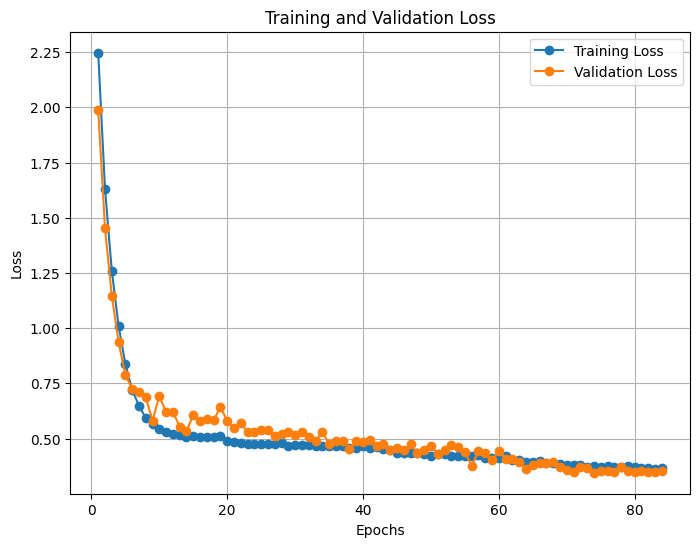

In [15]:
# Extract the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


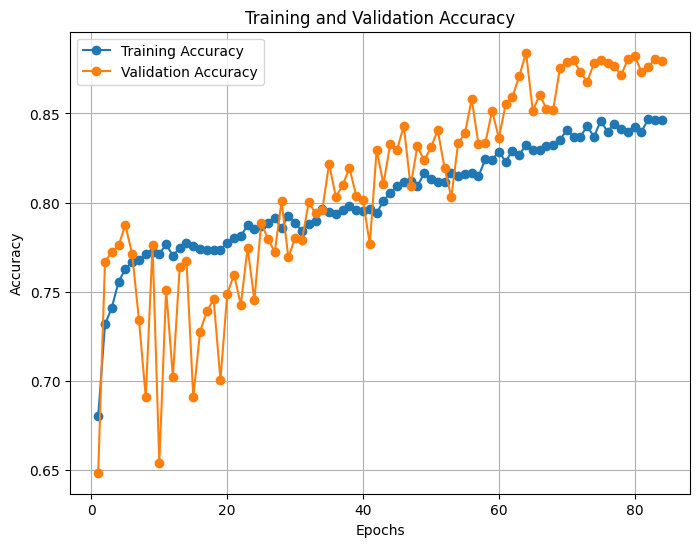

In [16]:
# Extract the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Predictions
y_pred_advanced_nn = (advanced_nn_model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_advanced_nn))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_advanced_nn, target_names=['No Churn', 'Churn']))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
Confusion Matrix:
[[859 177]
 [127 246]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.83      0.85      1036
       Churn       0.58      0.66      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



Alteration of the Evaluation code:

/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


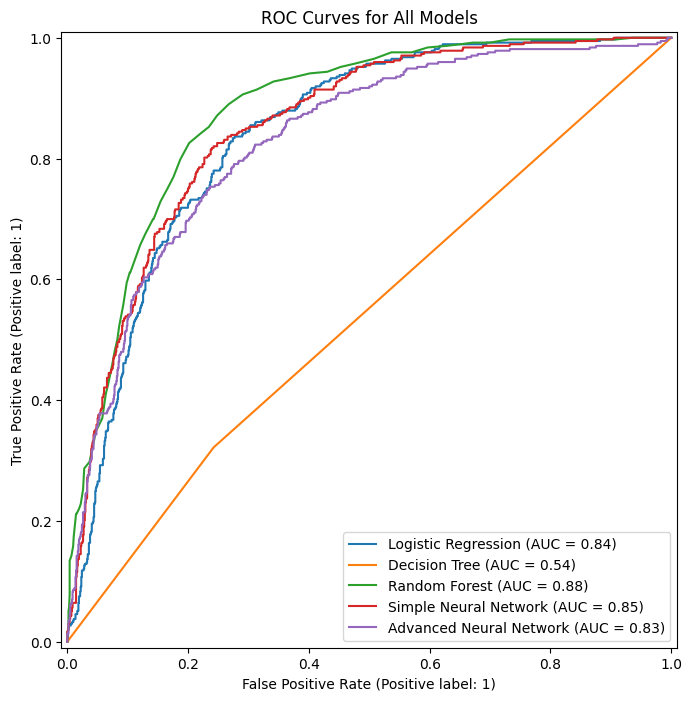

/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


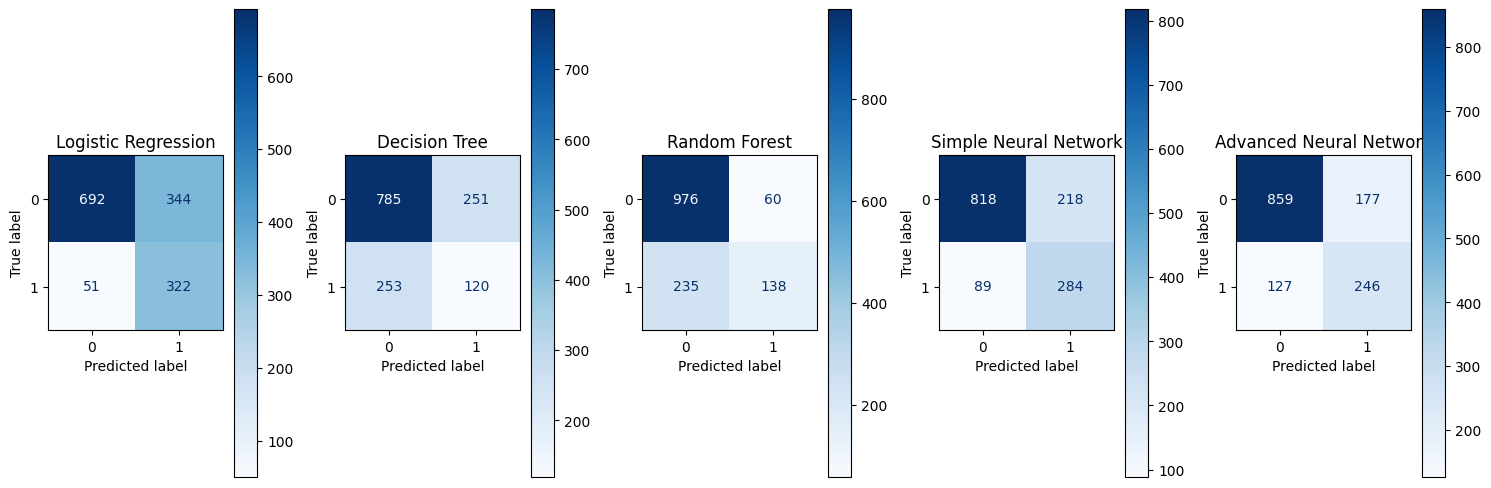

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1036
           1       0.48      0.86      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1036
           1       0.32      0.32      0.32       373

    accuracy                           0.64      1409
   macro avg       0.54      0.54      0.54      1409
weighted avg       0.64      0.64      0.64      1409

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.37      0.48       373

    accuracy                           0.79      1409

/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/noel_personal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
def plot_model_performance(models, X_test, y_test):
    """
    Plots ROC curves for all models first, followed by confusion matrices in subplots.
    
    Parameters:
        models (dict): Dictionary with model names as keys and trained models as values.
        X_test (DataFrame): Test features.
        y_test (Series): True labels for test data.
    """
    # Step 1: Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if model_name in ["Simple Neural Network", "Advanced Neural Network"]:
            # Handle neural networks (Keras models)
            y_prob = model.predict(X_test, verbose=0).flatten()
        elif hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue  # Skip models that cannot provide probabilities

        RocCurveDisplay.from_predictions(y_test, y_prob, name=model_name, ax=plt.gca())
    
    plt.title("ROC Curves for All Models")
    plt.legend(loc="lower right")
    plt.show()

    # Step 2: Display all confusion matrices in a grid
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(15, 5))
    axes = axes.flatten()  # Ensure axes is iterable

    for idx, (model_name, model) in enumerate(models.items()):
        if model_name in ["Simple Neural Network", "Advanced Neural Network"]:
            # Handle neural networks (Keras models)
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", ax=axes[idx])
        axes[idx].set_title(model_name)

    plt.tight_layout()
    plt.show()

    # Step 3: Print classification reports
    for model_name, model in models.items():
        if model_name in ["Simple Neural Network", "Advanced Neural Network"]:
            y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

# Include the advanced neural network in the models dictionary
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Simple Neural Network": nn_model,
    "Advanced Neural Network": advanced_nn_model  
}

# Plot the performance of all models
plot_model_performance(models, X_test, y_test)


## Best Model Selection

Based on the evaluation metrics of accuracy, precision, recall, F1-score, and AUC, the **Random Forest** model stands out as the best-performing model overall.

---

### **Model Performance Summary**

| Model                     | Accuracy | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | AUC  |
|---------------------------|----------|--------------------|----------------|------------------|------|
| Logistic Regression       | 0.72     | 0.48               | 0.86           | 0.62             | 0.84 |
| Decision Tree             | 0.64     | 0.32               | 0.32           | 0.32             | 0.54 |
| Random Forest             | 0.79     | 0.70               | 0.37           | 0.48             | 0.88 |
| Simple Neural Network     | 0.78     | 0.57               | 0.76           | 0.65             | 0.85 |
| Advanced Neural Network   | 0.78     | 0.58               | 0.66           | 0.62             | 0.83 |

---

### **Analysis**

- **Random Forest**:
  - Achieved the highest accuracy (0.79) and the highest AUC (0.88), indicating its ability to distinguish between churn and no-churn cases effectively.
  - Precision for the minority class (churn) is strong at 0.70, although its recall is lower (0.37), which indicates some missed churn cases.
  
- **Logistic Regression**:
  - Achieved a reasonable recall (0.86) for the churn class but struggled with precision (0.48).
  - Its overall accuracy (0.72) and AUC (0.84) are lower than Random Forest.

- **Simple Neural Network**:
  - Balanced recall (0.76) and precision (0.57) for the churn class, making it competitive for minority class predictions.
  - Accuracy (0.78) and AUC (0.85) are slightly lower than Random Forest.

- **Advanced Neural Network**:
  - Similar to the Simple Neural Network, with slightly lower metrics for recall (0.66) and precision (0.58).
  - Accuracy (0.78) and AUC (0.83) are also slightly behind Random Forest.

- **Decision Tree**:
  - Performed the worst overall, with low accuracy (0.64) and weak metrics for churn prediction.

---

### **Conclusion**

The **Random Forest** model is the best choice, as it achieves the highest accuracy (0.79), precision for churn (0.70), and AUC (0.88). While its recall for churn is lower, its overall performance makes it the most reliable model for customer churn prediction.

For business-critical applications that prioritize churn recall, the **Simple Neural Network** could also be considered due to its higher recall (0.76) for the churn class.
